# Imports

In [1]:
from diffusers import StableDiffusionUpscalePipeline
import torch
from utils import get_device, plot_img, download_image

/home/shane/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


# Constants

In [2]:
model_id = "stabilityai/stable-diffusion-x4-upscaler"
inf_steps = 20
device = get_device()

# Pipeline

In [3]:
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline.enable_xformers_memory_efficient_attention()
pipeline = pipeline.to(device)


Fetching 14 files: 100%|██████████| 14/14 [00:00<00:00, 184654.89it/s]
/home/shane/projects/.venv/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:104: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


# Testing it out

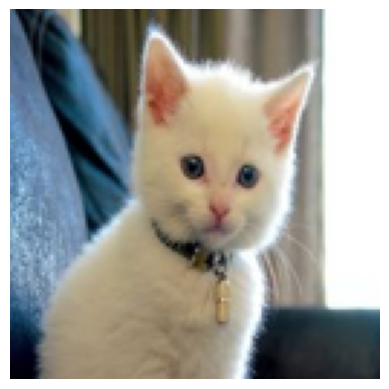

In [4]:
# Download image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
low_res_img = download_image(url)
plot_img(low_res_img)

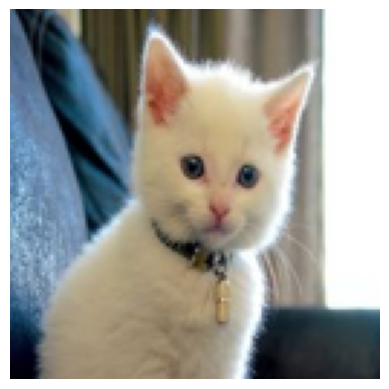

In [5]:
low_res_img.resize((128,128))
plot_img(low_res_img)

100%|██████████| 75/75 [00:09<00:00,  8.17it/s]


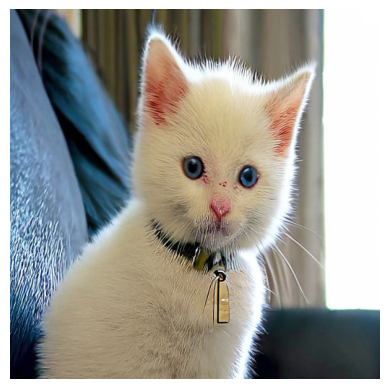

In [6]:
prompt = "a white cat"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
plot_img(upscaled_image)